In [1]:
import numpy as np
csv_path = "E:\DiveIntoCode\source\mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


【問題1】データの可視化

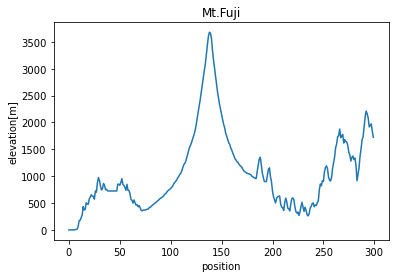

In [2]:
import matplotlib.pyplot as plt


# csvデータ(fuji)から特定の列を抽出
x_position = fuji[:,0]
y_elevation = fuji[:,3]

# 描画処理
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(x_position, y_elevation)
plt.show()

【問題2】ある地点の勾配を計算する関数を作成

In [3]:
import numpy as np


np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

x_position = fuji[:,0]
y_elevation = fuji[:,3]

# ある地点の勾配を計算する関数
def calculate_d_a(x_elevation, y_elevation):
    d_a = (y_elevation[1:] - y_elevation[:-1])/(x_position[1:] - x_position[:-1])
    return d_a

d_a = calculate_d_a(x_position, y_elevation)

print(d_a)

[   0.      0.      0.      0.      0.      6.62    0.59    4.99   42.21
  117.15    6.28   50.37   47.17  158.38  -62.02    8.32  123.34  -18.01
   -7.57  102.68   30.42   44.04  -26.74   -1.58  -54.09  151.4   -22.01
  177.53   96.7   -57.01 -102.16  -73.94   27.86   93.14  -37.54  -78.13
    7.72  -31.61    0.      0.      0.      0.      0.      0.      0.
    0.      0.    127.68   -0.82  -20.36   49.44   74.7  -105.62  -17.92
  -41.59  -51.04  109.86 -110.53   -1.82  -64.24 -108.22  -11.79  -54.82
   60.87  -55.26  -40.69    7.33  -40.17   24.72  -41.94  -49.98   -6.61
   13.23    2.13    0.15    6.43    9.02    3.5    28.27    2.19   22.4
   15.66   13.16   16.58   16.7    14.44   17.     17.1    21.43   13.92
   13.37   10.68   18.67   28.72   11.93   27.79   25.57   15.45   12.51
   18.9    22.67   22.37   41.     25.27   26.61   22.24   40.58   26.92
   34.1    25.35   46.11   60.78   53.28   20.11   52.55   67.58   69.65
   76.91   55.28   36.42   61.07   67.07   55.48   68.

【問題3】移動先の地点を計算する関数を作成

In [27]:
import numpy as np
from decimal import Decimal

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

x_position = fuji[:,0]
y_elevation = fuji[:,3]

position = 142 # 今いる地点

# ある地点の勾配を計算する関数
def calculate_d_a(x_elevation, y_elevation):
    d_a = (y_elevation[1:] - y_elevation[:-1])/(x_position[1:] - x_position[:-1])
    return d_a

# 移動先の地点を計算する関数
def calculate_destination(position, d_a):
    destination = position - (0.2 * d_a[position])
    d = Decimal(destination)
    destination_position = int(d.quantize(Decimal("0")))
    return destination_position

d_a = calculate_d_a(x_position, y_elevation)
destination_position = calculate_destination(position, d_a)


print(f"今いる地点{position}からの移動先は{destination_position}です。")

今いる地点142からの移動先は172です。


【問題4】山を下る関数を作成

In [37]:
import numpy as np
from decimal import Decimal


np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

x_position = fuji[:,0]
y_elevation = fuji[:,3]

position = 136 # 今いる地点

# ある地点の勾配を計算する関数
def calculate_d_a(x_elevation, y_elevation):
    d_a = (y_elevation[1:] - y_elevation[:-1])/(x_position[1:] - x_position[:-1])
    return d_a


# 移動先の地点を計算する関数
def calculate_destination(position, d_a):
    destination = position - (0.2 * d_a[position])
    d = Decimal(destination)
    destination_position = int(d.quantize(Decimal("0")))
    return destination_position



# 山を下る関数
def go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation):
    MIN_NUM = 1 # 標高の誤差がこの値を下回ったときに下山したとみなす
    y_difference = y_elevation[position] - y_elevation[destination_position]
    while y_difference > MIN_NUM:
        pre_elevation = y_elevation[destination_position]
        destination_position = calculate_destination(destination_position, d_a)
        if pre_elevation <= y_elevation[destination_position]:
            break
        else:
            list_position.append(destination_position)
            list_elevation.append(y_elevation[destination_position])
            y_difference = pre_elevation - y_elevation[destination_position]

    return list_position, list_elevation


d_a = calculate_d_a(x_position, y_elevation)
destination_position = calculate_destination(position, d_a)

list_position = [position, destination_position]
list_elevation = [y_elevation[position], y_elevation[destination_position]]

list_position, list_elevation = go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation)

print(list_position)
print(list_elevation)

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74]
[3434.59, 858.62, 741.17, 672.36, 575.07, 519.54, 471.82, 420.6, 377.62, 371.04]


【問題5】下山過程の可視化

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74]
[3434.59, 858.62, 741.17, 672.36, 575.07, 519.54, 471.82, 420.6, 377.62, 371.04]


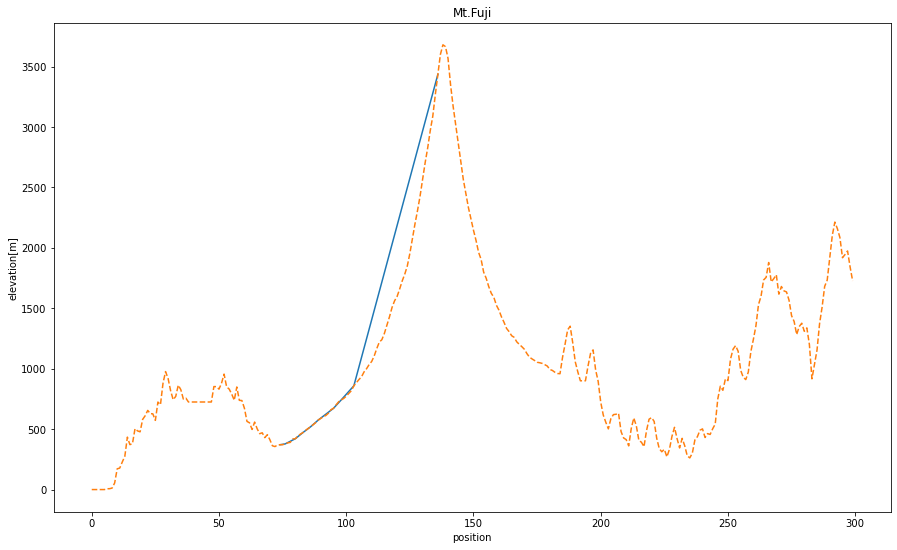

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal


np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

x_position = fuji[:,0]
y_elevation = fuji[:,3]

position = 136 # 今いる地点

# ある地点の勾配を計算する関数
def calculate_d_a(x_elevation, y_elevation):
    d_a = (y_elevation[1:] - y_elevation[:-1])/(x_position[1:] - x_position[:-1])
    return d_a


# 移動先の地点を計算する関数
def calculate_destination(position, d_a):
    destination = position - (0.2 * d_a[position])
    d = Decimal(destination)
    destination_position = int(d.quantize(Decimal("0")))
    return destination_position


# 山を下る関数
def go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation):
    MIN_NUM = 1 # 標高の誤差がこの値を下回ったときに下山したとみなす
    y_difference = y_elevation[position] - y_elevation[destination_position]
    while y_difference > MIN_NUM:
        pre_elevation = y_elevation[destination_position]
        destination_position = calculate_destination(destination_position, d_a)
        if pre_elevation <= y_elevation[destination_position]:
            break
        else:
            list_position.append(destination_position)
            list_elevation.append(y_elevation[destination_position])
            y_difference = pre_elevation - y_elevation[destination_position]

    return list_position, list_elevation


d_a = calculate_d_a(x_position, y_elevation)
destination_position = calculate_destination(position, d_a)

list_position = [position, destination_position]
list_elevation = [y_elevation[position], y_elevation[destination_position]]

list_position, list_elevation = go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation)

print(list_position)
print(list_elevation)

# 描画処理
plt.rcParams["figure.figsize"] = (15,9)
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(list_position, list_elevation)
plt.plot(x_position, y_elevation, linestyle='--')
plt.show()

【問題6】初期値の変更
【問題7】初期値ごとの下山過程の可視化

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74]
[3434.59, 858.62, 741.17, 672.36, 575.07, 519.54, 471.82, 420.6, 377.62, 371.04]


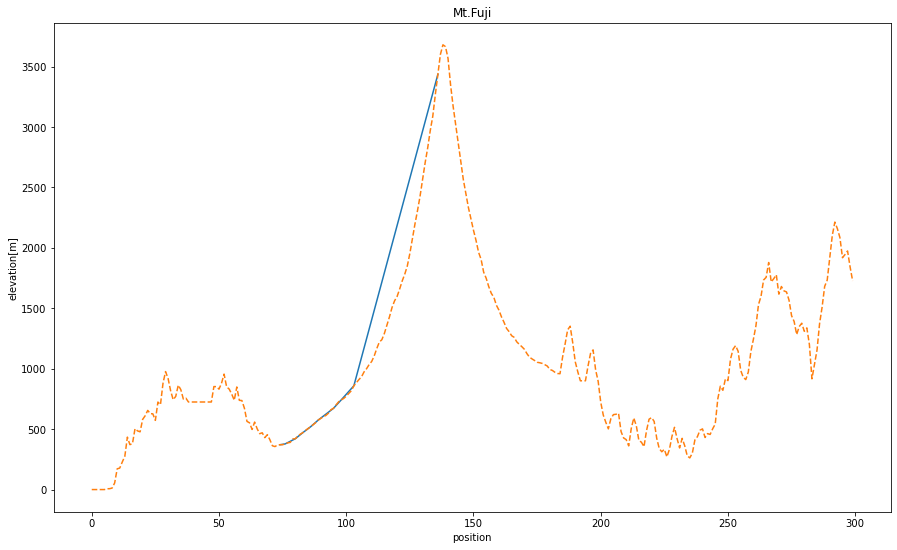

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal


np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

x_position = fuji[:,0]
y_elevation = fuji[:,3]

position = 136 # 今いる地点
#position = 142 # 今いる地点

# ある地点の勾配を計算する関数
def calculate_d_a(x_elevation, y_elevation):
    d_a = (y_elevation[1:] - y_elevation[:-1])/(x_position[1:] - x_position[:-1])
    return d_a


# 移動先の地点を計算する関数
def calculate_destination(position, d_a):
    destination = position - (0.2 * d_a[position])
    d = Decimal(destination)
    destination_position = int(d.quantize(Decimal("0")))
    return destination_position


# 山を下る関数
def go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation):
    MIN_NUM = 1 # 標高の誤差がこの値を下回ったときに下山したとみなす
    y_difference = y_elevation[position] - y_elevation[destination_position]
    while y_difference > MIN_NUM:
        pre_elevation = y_elevation[destination_position]
        destination_position = calculate_destination(destination_position, d_a)
        if pre_elevation <= y_elevation[destination_position]:
            break
        else:
            list_position.append(destination_position)
            list_elevation.append(y_elevation[destination_position])
            y_difference = pre_elevation - y_elevation[destination_position]

    return list_position, list_elevation


d_a = calculate_d_a(x_position, y_elevation)
destination_position = calculate_destination(position, d_a)

list_position = [position, destination_position]
list_elevation = [y_elevation[position], y_elevation[destination_position]]

list_position, list_elevation = go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation)

print(list_position)
print(list_elevation)

# 描画処理
plt.rcParams["figure.figsize"] = (15,9)
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(list_position, list_elevation)
plt.plot(x_position, y_elevation, linestyle='--')
plt.show()

[142, 172, 175, 176, 177, 179]
[3171.53, 1095.73, 1053.28, 1049.33, 1043.91, 1022.1]


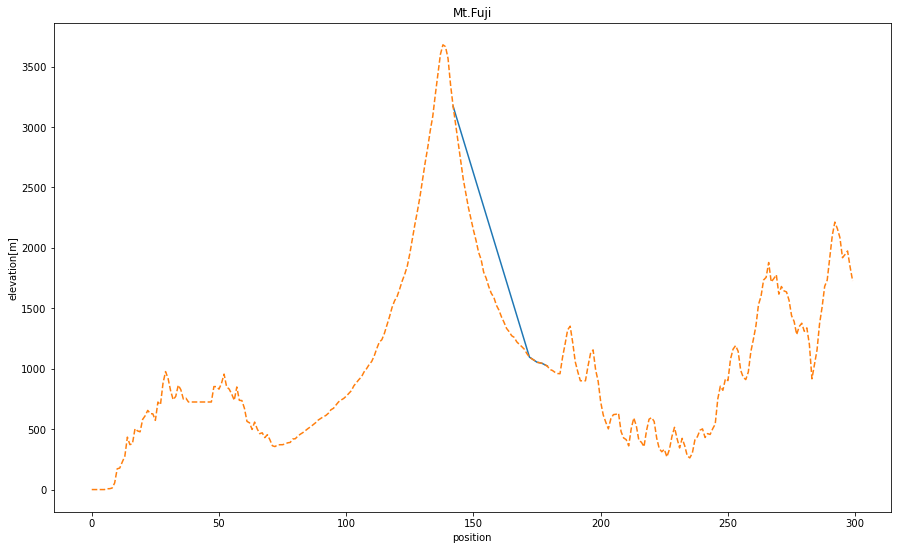

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal


np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

x_position = fuji[:,0]
y_elevation = fuji[:,3]

#position = 136 # 今いる地点
position = 142 # 今いる地点

# ある地点の勾配を計算する関数
def calculate_d_a(x_elevation, y_elevation):
    d_a = (y_elevation[1:] - y_elevation[:-1])/(x_position[1:] - x_position[:-1])
    return d_a


# 移動先の地点を計算する関数
def calculate_destination(position, d_a):
    destination = position - (0.2 * d_a[position])
    d = Decimal(destination)
    destination_position = int(d.quantize(Decimal("0")))
    return destination_position


# 山を下る関数
def go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation):
    MIN_NUM = 1 # 標高の誤差がこの値を下回ったときに下山したとみなす
    y_difference = y_elevation[position] - y_elevation[destination_position]
    while y_difference > MIN_NUM:
        pre_elevation = y_elevation[destination_position]
        destination_position = calculate_destination(destination_position, d_a)
        if pre_elevation <= y_elevation[destination_position]:
            break
        else:
            list_position.append(destination_position)
            list_elevation.append(y_elevation[destination_position])
            y_difference = pre_elevation - y_elevation[destination_position]

    return list_position, list_elevation


d_a = calculate_d_a(x_position, y_elevation)
destination_position = calculate_destination(position, d_a)

list_position = [position, destination_position]
list_elevation = [y_elevation[position], y_elevation[destination_position]]

list_position, list_elevation = go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation)

print(list_position)
print(list_elevation)

# 描画処理
plt.rcParams["figure.figsize"] = (15,9)
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(list_position, list_elevation)
plt.plot(x_position, y_elevation, linestyle='--')
plt.show()

【問題8】（アドバンス問題）ハイパーパラメータの変更

[136, 53, 62]
[3434.59, 849.52, 552.23]


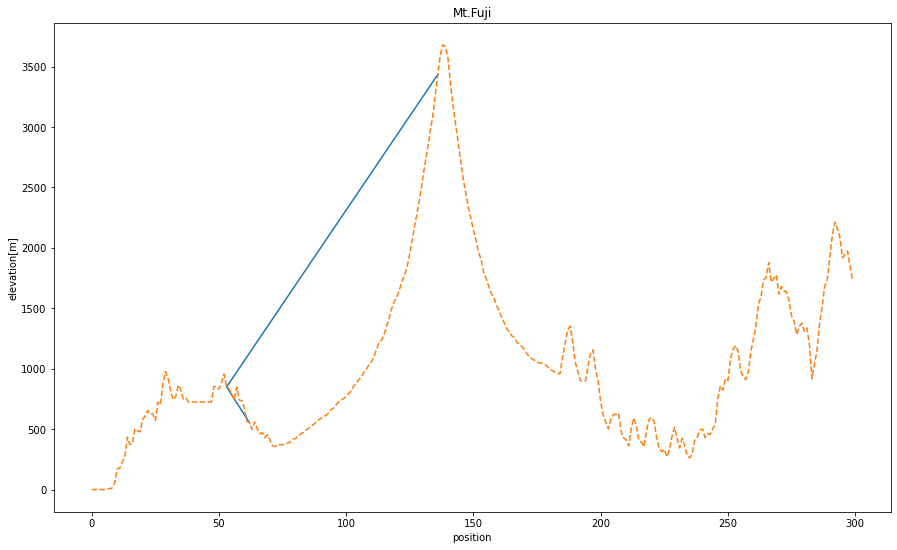

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal


np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

x_position = fuji[:,0]
y_elevation = fuji[:,3]

position = 136 # デフォルト値
#position = 142 # 今いる地点

#alpha_param = 0.2 # デフォルト値
alpha_param = 0.5 # デフォルト値


# ある地点の勾配を計算する関数
def calculate_d_a(x_elevation, y_elevation):
    d_a = (y_elevation[1:] - y_elevation[:-1])/(x_position[1:] - x_position[:-1])
    return d_a


# 移動先の地点を計算する関数
def calculate_destination(position, d_a):
    destination = position - (alpha_param * d_a[position])
    d = Decimal(destination)
    destination_position = int(d.quantize(Decimal("0")))
    return destination_position


# 山を下る関数
def go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation):
    MIN_NUM = 1 # 標高の誤差がこの値を下回ったときに下山したとみなす
    y_difference = y_elevation[position] - y_elevation[destination_position]
    while y_difference > MIN_NUM:
        pre_elevation = y_elevation[destination_position]
        destination_position = calculate_destination(destination_position, d_a)
        if pre_elevation <= y_elevation[destination_position]:
            break
        else:
            list_position.append(destination_position)
            list_elevation.append(y_elevation[destination_position])
            y_difference = pre_elevation - y_elevation[destination_position]

    return list_position, list_elevation


d_a = calculate_d_a(x_position, y_elevation)
destination_position = calculate_destination(position, d_a)

list_position = [position, destination_position]
list_elevation = [y_elevation[position], y_elevation[destination_position]]

list_position, list_elevation = go_down_the_mountain(position, destination_position, d_a, list_position, list_elevation)

print(list_position)
print(list_elevation)

# 描画処理
plt.rcParams["figure.figsize"] = (15,9)
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(list_position, list_elevation)
plt.plot(x_position, y_elevation, linestyle='--')
plt.show()